<a href="https://colab.research.google.com/github/alouwyck/vives-intro-to-ai/blob/main/topic6/Flying_from_BXL_to_IST_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

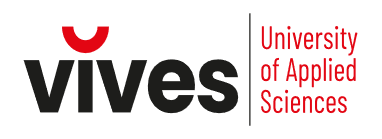<br>


**INTRODUCTION TO ARTIFICIAL INTELLIGENCE**<br>
VIVES BUSINESS ACADEMY<br>
Academic Year 2023-2024<br>
Andy Louwyck

---



---



# **Flying from Brussels to Istanbul**

## Intro

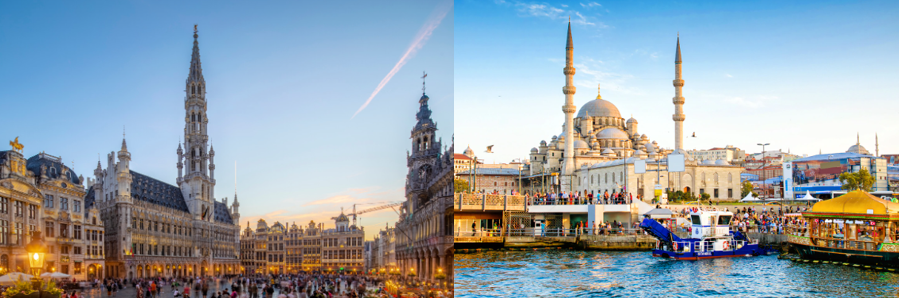

You have to fly from Brussels in Belgium to Istanbul in Turkey. The possible flight routes you may take are:

In [ ]:
routes = [["Brussels", "Paris"],
          ["Brussels", "Berlin"],
          ["Brussels", "Bern"],
          ["Paris", "Bern"],
          ["Berlin", "Budapest"],
          ["Berlin", "Bern"],
          ["Bern", "Rome"],
          ["Bern", "Belgrade"],
          ["Rome", "Athens"],
          ["Rome", "Belgrade"],
          ["Belgrade", "Bucharest"],
          ["Belgrade", "Athens"],
          ["Budapest", "Belgrade"],
          ["Budapest", "Bucharest"],
          ["Athens", "Istanbul"],
          ["Bucharest", "Istanbul"]]

Use Python package [GeoPandas](https://geopandas.org/en/stable/) to calculate the direct straight-line distances of the flight routes. This means you have to calculate the distance [as the crow flies](https://en.wikipedia.org/wiki/As_the_crow_flies) between the two cities of each route.

GeoPandas is already installed in Google Colab. You can use the `'naturalearth_cities'` dataset to get the coordatines of each city:

In [ ]:
import geopandas
geopandas.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

This dataset is read as follows:

In [ ]:
path_to_data = geopandas.datasets.get_path("naturalearth_cities")
gdf = geopandas.read_file(path_to_data)
gdf.head()

<ipython-input-3-7c59a71dba71>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path_to_data = geopandas.datasets.get_path("naturalearth_cities")


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


Variable `gdf` contains a `GeoDataFrame`, which is a [Pandas](https://pandas.pydata.org/) DataFrame that has a `geometry` attribute:

In [ ]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In this case, the cities are [shapely](https://shapely.readthedocs.io/en/stable/manual.html) `POINT` objects and each point is characterized by its coordinates expressed in [latitude and longitude](https://en.wikipedia.org/wiki/Geographic_coordinate_system). Here is the code to get the coordinate of Brussels:

In [ ]:
brussels = gdf[gdf.name == "Brussels"].geometry.iloc[0]  # selecting Brussels POINT from gdf
brussels.x, brussels.y  # (lon, lat)

(4.3313707, 50.8352629)

You can obtain the coordinate of Paris in the same way:

In [ ]:
paris = gdf[gdf.name == "Paris"].geometry.iloc[0]  # selecting Paris POINT from gdf
paris.x, paris.y  # (lon, lat)

(2.3529924615392135, 48.85809231626911)

To calculate the distance as the crow flies between these two cities, you can use the following function:

In [ ]:
import geopy.distance

def distance(city1, city2):
    # city1 and city2 are shapely.geometry.point.Point objects
    lat1, lon1 = city1.y, city1.x
    lat2, lon2 = city2.y, city2.x
    return int(geopy.distance.geodesic((lat1, lon1), (lat2, lon2)).meters / 1000)  # distance in km

Let's test the function using points `brussels` and `paris`:

In [ ]:
distance(brussels, paris)

261

It returns 261 km, which is indeed the approximate distance as the crow flies between these two cities.

Using the `naturalearth_lowres` dataset, it is possible to plot the two cities on a low-resolution map of Europe. The (lon, lat) coordinate is used to plot the cities and the routes. Note that GeoPandas applies [Matplotlib](https://matplotlib.org/) for plotting:

<ipython-input-9-95f2acbe00f6>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  map = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))  # read the naturalearth_lowres dataset


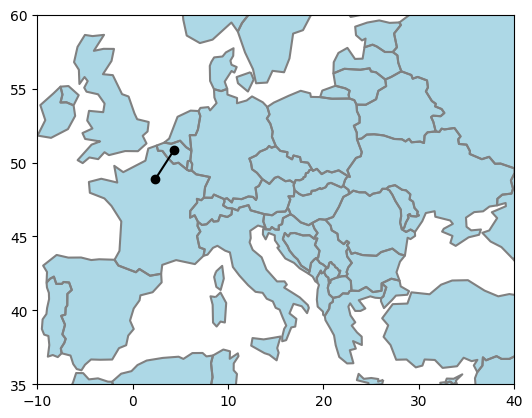

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1);  # create a new figure fig and axes ax
map = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))  # read the naturalearth_lowres dataset
map.plot(color='lightblue', ax=ax);  # plot the map of the world
map.boundary.plot(color='gray', ax=ax);  # plot the boundaries of the countries
gdf[gdf["name"].isin(["Brussels", "Paris"])].plot(color='black', ax=ax);  # plot Brussels and Paris
plt.plot((brussels.x, paris.x), (brussels.y, paris.y), 'k-');  # plot route between Brussels and Paris
plt.xlim((-10, 40));  # zoom in to Europe
plt.ylim((35, 60));  # zoom in to Europe

## Instructions

1. Plot all cities and all given flight routes on a map of Europe.
2. Calculate the distance of all flight routes. Write your code as generic as possible. Document your code!
3. To find the optimal route between Brussels and Istanbul, apply Hill Climbing (HC), Greedy Search (GS), and Beam Search (BC) with width equal to 2. Use the [SearchExerciser](https://github.com/alouwyck/SearchExerciser) package. Define an appropriate heuristic value for each city! Check the notebooks in the SearchExerciser repository for examples.
4. Apply the A* algorithm which will be discussed and explained in the next topic of this course. This algorithm always finds the optimal path! You can import it from `SearchExerciser.search.optimal`.
5. Explain the results of the heuristic search algorithms (HC, GS and BS) you have applied!


## Solution